In [38]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt

# Assign datasheet path to variable
file_path = 'data\Characteristics of Retirees.xlsx'

# Read the Excel file into a DataFrame
retirement_characteristics = pd.read_excel(file_path)

#Tidy data that suits how you wish to present the data
columns_to_keep = [0, 1, 2, 3, 4, 5, 8, 11, 14, 17, 20]
new_header = ["Year", "Population of Interest", "Sex", "Classification", "Category", "Retired Age 54 & Under (people in thousands)", "Retired Age 55-59 (people in thousands)", "Retired Age 60-64 (people in thousands)", "Retired Age 65-69 (people in thousands)", "Retired Age 70 & Over (people in thousands)", "Total Retirees (thousands)"]

#Use variables to execute data cleaning
retirement_characteristics = retirement_characteristics.iloc[:, columns_to_keep]
retirement_characteristics.columns = new_header

#Convert data to data frame
raw_data = pd.DataFrame(retirement_characteristics)


In [39]:
#Take out the rows containing the totals to prevent compromising the data
tidied_retirement_df = []

#
for index, row in raw_data.iterrows():
    if row['Category'] != 'TOTAL':
        tidied_retirement_df.append(row)

tidied_retirement_df = pd.DataFrame(tidied_retirement_df)

In [40]:
#List the categories for future reference
categories = raw_data['Category'].unique()
classification = raw_data['Classification'].unique()
pop_interest = raw_data['Population of Interest'].unique()
year = raw_data['Year'].unique()

categories = list(categories)
classification = list(classification)
pop_interest = list(pop_interest)
year = list(year)

In [41]:
#Establish classifications lists for data pulling
income_classification = [
'Weekly personal income from all sources',
 "Partner's weekly income from all sources",
 'Weekly household income from all sources',
]

GENERALISED DATAFRAME (Use to answer question 2)

In [42]:
#Create data frame without gender specific data 'Persons' as is the total of 'Male' & 'Female' data and unecessary .
generalised_df = []

for index, row in tidied_retirement_df.iterrows():
    if row['Sex'] == 'Persons':
        generalised_df.append(row)

generalised_df = pd.DataFrame(generalised_df)

#Remove 'Sex' column as it is no longer necessary
generalised_df = generalised_df.drop(['Sex'], axis=1)

In [43]:
#In preparation for creating an income data frame & grouping it, create a dictionary.
#This dictionary will act as a reference to only append relevant data rows to the data frame.
#This dictionary will also allow you to correctly order the data via reference code (considering the dollar values will order alphabetically, not numerically)

household_income = {
 'No partner': '00',
 'No income (or negative income)': '01',
 '$1 - $200': '02',
 '$200 - $400': '03',
 '$400 - $600': '04',
 '$600 - $800': '05',
 '$800 - $1,000': '06',
 '$1,000 - $2,000': '07',
 '$1,000 - $1,250': '08',
 '$1,250 - $1,500': '09',
 '$1,500 - $2,000': '10',
 '$2,000 or more': '11',
}

income_classification = {
 'Weekly personal income from all sources': 'a',
 "Partner's weekly income from all sources": 'b',
 'Weekly household income from all sources': 'c',
}

INDEPENDANT INCOME:
Group the age of retirement data based on their incomes

In [55]:
#Append data based on category & classification. Drop any unnecessary rows included in the data.
income_df = []

for index, row in generalised_df.iterrows():
    if row['Classification'] in income_classification and row['Category'] in household_income and row['Category'] != 'Not stated' and row['Population of Interest'] == 'Retired at 45 years and over':
        income_df.append(row)

income_df = pd.DataFrame(income_df)
income_df

,Year,Population of Interest,Classification,Category,Retired Age 54 & Under (people in thousands),Retired Age 55-59 (people in thousands),Retired Age 60-64 (people in thousands),Retired Age 65-69 (people in thousands),Retired Age 70 & Over (people in thousands),Total Retirees (thousands)
4149,2014-15,Retired at 45 years and over,Weekly personal income from all sources,No income (or negative income),57.069,64.315,28.432,12.465,5.509,167.790
4150,2014-15,Retired at 45 years and over,Weekly personal income from all sources,$1 - $200,44.229,38.928,39.923,12.906,10.725,146.710
4151,2014-15,Retired at 45 years and over,Weekly personal income from all sources,$200 - $400,278.482,210.342,242.215,135.492,57.937,924.467
4152,2014-15,Retired at 45 years and over,Weekly personal income from all sources,$400 - $600,202.485,155.426,205.432,122.738,44.752,730.833
4153,2014-15,Retired at 45 years and over,Weekly personal income from all sources,$600 - $800,22.153,46.885,32.851,26.818,11.826,140.533
...,...,...,...,...,...,...,...,...,...,...
24693,2020-21,Retired at 45 years and over,Weekly household income from all sources,"$800 - $1,000",60.081,67.657,106.046,70.629,21.151,325.566
24694,2020-21,Retired at 45 years and over,Weekly household income from all sources,"$1,000 - $1,250",70.407,59.551,92.620,53.942,15.876,292.396
24695,2020-21,Retired at 45 years and over,Weekly household income from all sources,"$1,250 - $1,500",29.461,41.021,51.431,43.297,5.596,170.806
24696,2020-21,Retired at 45 years and over,Weekly household income from all sources,"$1,500 - $2,000",40.645,61.788,54.372,23.123,16.645,196.572


In [56]:
#Group the charting data by year, classification & category to create chart
income_df = income_df.groupby(['Year','Classification','Category'], as_index=False)[['Retired Age 54 & Under (people in thousands)', 'Retired Age 55-59 (people in thousands)', 'Retired Age 60-64 (people in thousands)',	'Retired Age 65-69 (people in thousands)',	'Retired Age 70 & Over (people in thousands)','Total Retirees (thousands)']].median()

#Understanding grouping data will reorganise this data alphabetically (including monetary values under category), create a column to hold references (based on dictionary) to re order the data in an appropriate format
income_df['Reference'] = income_df['Classification'].map(income_classification) + \
    income_df['Category'].map(household_income)

income_df = income_df.sort_values(['Year','Reference'])
income_df

,Year,Classification,Category,Retired Age 54 & Under (people in thousands),Retired Age 55-59 (people in thousands),Retired Age 60-64 (people in thousands),Retired Age 65-69 (people in thousands),Retired Age 70 & Over (people in thousands),Total Retirees (thousands),Reference
26,2014-15,Weekly personal income from all sources,No income (or negative income),57.069,64.315,28.432,12.465,5.509,167.790,a01
19,2014-15,Weekly personal income from all sources,$1 - $200,44.229,38.928,39.923,12.906,10.725,146.710,a02
22,2014-15,Weekly personal income from all sources,$200 - $400,278.482,210.342,242.215,135.492,57.937,924.467,a03
23,2014-15,Weekly personal income from all sources,$400 - $600,202.485,155.426,205.432,122.738,44.752,730.833,a04
24,2014-15,Weekly personal income from all sources,$600 - $800,22.153,46.885,32.851,26.818,11.826,140.533,a05
...,...,...,...,...,...,...,...,...,...,...
98,2020-21,Weekly household income from all sources,"$800 - $1,000",60.081,67.657,106.046,70.629,21.151,325.566,c06
91,2020-21,Weekly household income from all sources,"$1,000 - $1,250",70.407,59.551,92.620,53.942,15.876,292.396,c08
92,2020-21,Weekly household income from all sources,"$1,250 - $1,500",29.461,41.021,51.431,43.297,5.596,170.806,c09
93,2020-21,Weekly household income from all sources,"$1,500 - $2,000",40.645,61.788,54.372,23.123,16.645,196.572,c10


In [57]:
chart_data = []

new_column_names = {
    'Retired Age 54 & Under (people in thousands)': 'Retired Age 45-54',
    'Retired Age 55-59 (people in thousands)': 'Retired Age 55-59',
    'Retired Age 60-64 (people in thousands)': 'Retired Age 60-64',
    'Retired Age 65-69 (people in thousands)': 'Retired Age 65-69',
    'Retired Age 70 & Over (people in thousands)': 'Retired Age 70 & Over',
}

for index, row in income_df.iterrows():
    if row['Year'] == '2020-21':
        chart_data.append(row)

chart_data = pd.DataFrame(chart_data)
chart_data = chart_data.rename(columns=new_column_names)
chart_data = chart_data.iloc[:,[0,1,2,3,4,5,6,7,9]]
chart_data

,Year,Classification,Category,Retired Age 45-54,Retired Age 55-59,Retired Age 60-64,Retired Age 65-69,Retired Age 70 & Over,Reference
107,2020-21,Weekly personal income from all sources,No income (or negative income),88.038,65.940,64.107,25.604,8.969,a01
100,2020-21,Weekly personal income from all sources,$1 - $200,34.628,19.837,50.009,38.976,13.587,a02
103,2020-21,Weekly personal income from all sources,$200 - $400,184.186,183.736,230.590,157.730,63.316,a03
104,2020-21,Weekly personal income from all sources,$400 - $600,254.468,208.700,285.500,219.695,78.593,a04
105,2020-21,Weekly personal income from all sources,$600 - $800,40.324,63.881,101.730,67.079,25.927,a05
106,2020-21,Weekly personal income from all sources,"$800 - $1,000",30.435,45.911,40.954,26.925,13.810,a06
101,2020-21,Weekly personal income from all sources,"$1,000 - $2,000",45.734,71.334,89.500,40.732,23.699,a07
102,2020-21,Weekly personal income from all sources,"$2,000 or more",15.402,9.455,13.675,11.058,4.742,a11
89,2020-21,Partner's weekly income from all sources,No partner,324.942,243.403,297.585,256.886,108.501,b00
88,2020-21,Partner's weekly income from all sources,No income (or negative income),38.597,37.122,62.709,50.312,17.585,b01


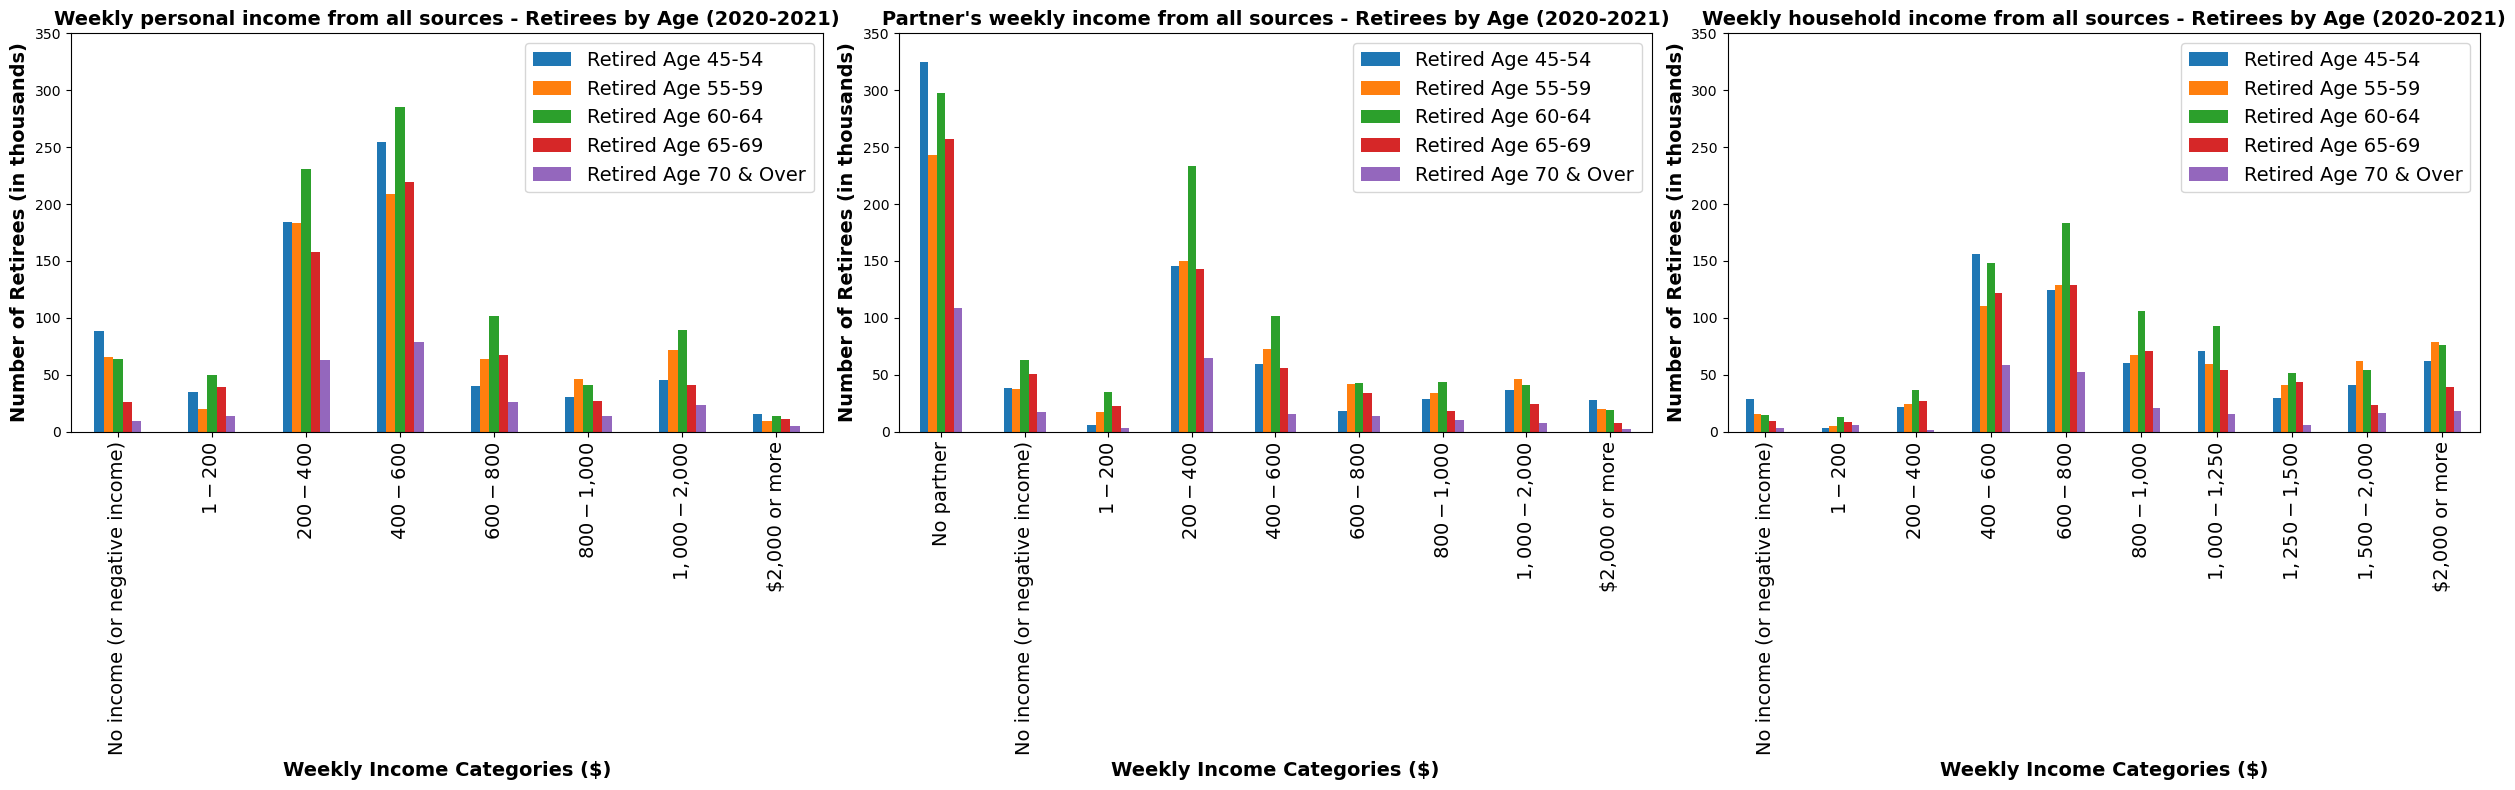

In [66]:
# Create visualisations to how old people were & what their income was before retiring
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))

classifications = chart_data['Classification'].unique()

for i, classification in enumerate(classifications):
    subset_df = chart_data[chart_data['Classification'] == classification]
    
    # Sort the DataFrame by the 'Reference' column
    subset_df_sorted = subset_df.sort_values('Reference')

    subset_df_sorted.set_index('Category').plot(kind='bar', stacked=False, ax=axes[i])

    axes[i].set_ylim(0, 350)

    axes[i].set_title(f'{classification} - Retirees by Age (2020-2021)', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Weekly Income Categories ($)', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Number of Retirees (in thousands)', fontsize=14, fontweight='bold')

    axes[i].tick_params(axis='x', rotation=90, labelsize=14)
    axes[i].legend(loc='upper right', fontsize=14)

plt.tight_layout()
plt.show()


In [60]:
#Prepare data for visualisation illustrating the difference in the pre retirement incomes
chart_data2 = []

for index, row in income_df.iterrows():
    if row['Year'] == '2020-21':
        chart_data2.append(row)

chart_data2 = pd.DataFrame(chart_data2)
chart_data2 = chart_data2.iloc[:,[0,1,2,8,9]]
chart_data2['Numeric_Reference'] = chart_data2['Reference'].str.extract('(\d+)')
chart_data2

,Year,Classification,Category,Total Retirees (thousands),Reference,Numeric_Reference
107,2020-21,Weekly personal income from all sources,No income (or negative income),252.657,a01,01
100,2020-21,Weekly personal income from all sources,$1 - $200,157.036,a02,02
103,2020-21,Weekly personal income from all sources,$200 - $400,819.558,a03,03
104,2020-21,Weekly personal income from all sources,$400 - $600,1046.956,a04,04
105,2020-21,Weekly personal income from all sources,$600 - $800,298.941,a05,05
106,2020-21,Weekly personal income from all sources,"$800 - $1,000",158.034,a06,06
101,2020-21,Weekly personal income from all sources,"$1,000 - $2,000",270.999,a07,07
102,2020-21,Weekly personal income from all sources,"$2,000 or more",54.331,a11,11
89,2020-21,Partner's weekly income from all sources,No partner,1231.317,b00,00
88,2020-21,Partner's weekly income from all sources,No income (or negative income),206.325,b01,01


In [61]:
#Categorise the data (Can utilise numeric reference to append the results accordingly)
classifications = chart_data2['Classification'].unique()

more_than_600 = {classification: [] for classification in classifications}
less_than_600 = {classification: [] for classification in classifications}

for index, row in chart_data2.iterrows():
    numeric_reference = row['Numeric_Reference']

    if numeric_reference is not None:
        numeric_reference = int(numeric_reference)
        if numeric_reference > 4:
            more_than_600[row['Classification']].append(row['Total Retirees (thousands)'])
        else:
            less_than_600[row['Classification']].append(row['Total Retirees (thousands)'])


more_than_600 = {classification: sum(values) for classification, values in more_than_600.items()}
less_than_600 = {classification: sum(values) for classification, values in less_than_600.items()}

more_than_600_num = [value for value in more_than_600.values()]
less_than_600_num = [value for value in less_than_600.values()]

more_than_600_words = list(more_than_600.keys())
less_than_600_words = list(less_than_600.keys())


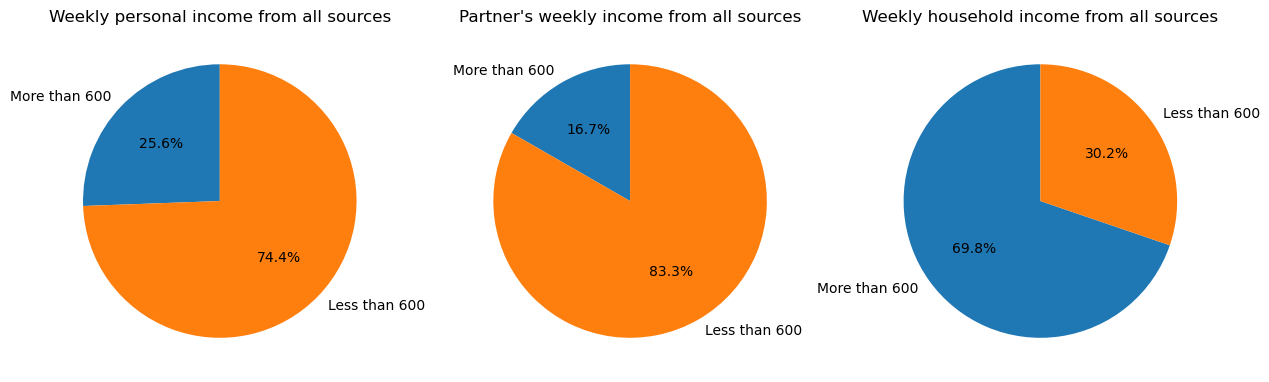

In [62]:
#Plot the data into pie charts
labels = ['More than 600', 'Less than 600']

comparison_values = []

for i in range(len(more_than_600)):
    comparison_values.append([more_than_600_num[i], less_than_600_num[i]])

fig, axs = plt.subplots(1, len(more_than_600_num), figsize=(5 * len(more_than_600_num), 5))

for i in range(len(more_than_600_num)):
    axs[i].pie(comparison_values[i], labels=labels, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'{more_than_600_words[i]}')

plt.show()

In [51]:
overtime_data = []

for index, row in tidied_retirement_df.iterrows():
    if row['Sex'] != 'Persons' and row['Classification'] == 'Age group':
        overtime_data.append(row)

overtime_data = pd.DataFrame(overtime_data)
overtime_chart_data = overtime_data.groupby(['Year','Sex'], as_index=False)['Total Retirees (thousands)'].median()

overtime_chart_data = pd.DataFrame(overtime_chart_data)
overtime_chart_data

,Year,Sex,Total Retirees (thousands)
0,2014-15,Females,32.2865
1,2014-15,Males,26.6295
2,2016-17,Females,29.0615
3,2016-17,Males,25.2390
4,2018-19,Females,36.6690
5,2018-19,Males,23.5365
6,2020-21,Females,36.2255
7,2020-21,Males,23.5215


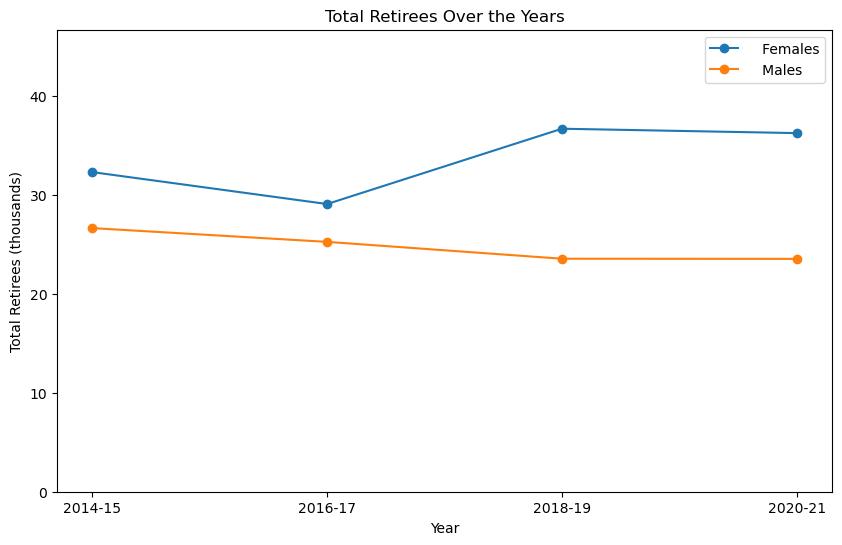

In [52]:
max_retirees = overtime_chart_data['Total Retirees (thousands)'].max() + 10

plt.figure(figsize=(10, 6))

for sex in overtime_chart_data['Sex'].unique():
    subset_data = overtime_chart_data[overtime_chart_data['Sex'] == sex]
    plt.plot(subset_data['Year'], subset_data['Total Retirees (thousands)'], label=sex, marker='o')


plt.xlabel('Year')
plt.ylabel('Total Retirees (thousands)')
plt.title('Total Retirees Over the Years')

plt.ylim(0, max_retirees)
plt.legend()

plt.show()
